# Init

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
import os

repo_name = 'yolov8_tracking'

if not os.path.exists(repo_name):
    !git clone --recurse-submodules https://github.com/ryuhat/yolov8_tracking.git
else:
    print(f"Directory {repo_name} already exists. Skipping clone.")

/content/drive/MyDrive
Directory yolov8_tracking already exists. Skipping clone.


In [62]:
# @title Cell to be skipped {display-mode: "form"}

# This cell will be skipped when running the notebook.
print("This cell will not be executed unless 'Include this cell' is selected.")


This cell will not be executed unless 'Include this cell' is selected.


# Keypoint

In [ ]:
import os, sys
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
mask = cv2.imread(MASK_DIR + 'mask.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_origin, mask_origin = img.copy(), mask.copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img)
axes[1].imshow(mask)
plt.show()

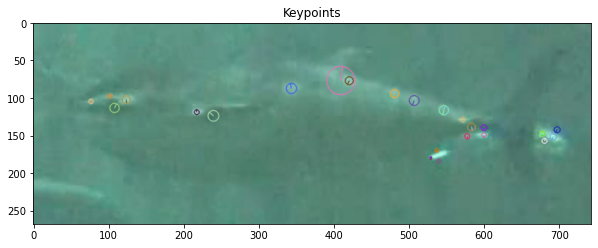

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
ax.set_title('Keypoints')
plt.show()



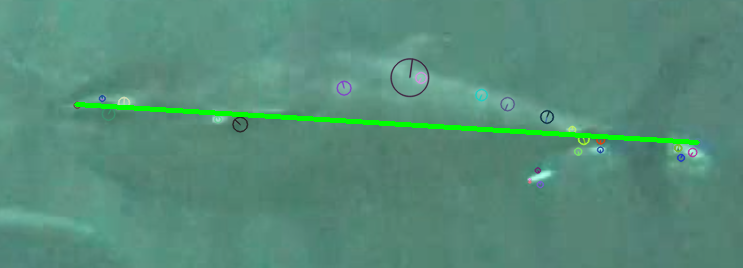

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Draw a line between the two points furthest from each other
distances = []
for i in range(len(kp)):
    for j in range(i+1, len(kp)):
        distance = ((kp[i].pt[0]-kp[j].pt[0])**2 + (kp[i].pt[1]-kp[j].pt[1])**2)**0.5
        distances.append((i, j, distance))
        
distances = sorted(distances, key=lambda x: x[2], reverse=True)

x1, y1 = kp[distances[0][0]].pt
x2, y2 = kp[distances[0][1]].pt

img_kp = cv2.line(img_kp, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)

cv2_imshow(img_kp)



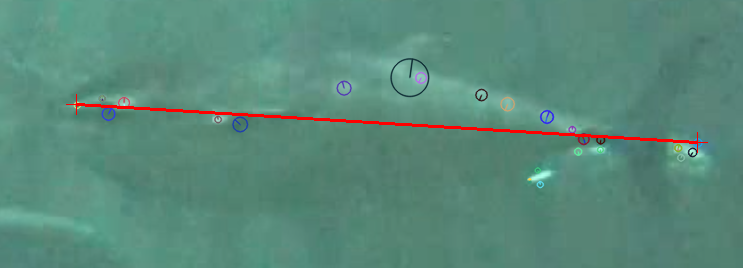

Max distance: 621.711115839924


In [ ]:
import cv2
import numpy as np

IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

max_dist = -1
for i in range(len(kp)):
    for j in range(i+1, len(kp)):
        dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
        if dist > max_dist:
            max_dist = dist
            max_i = i
            max_j = j

# Draw a line between the keypoints with the maximum distance
img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)

# Display the image with the line
from google.colab.patches import cv2_imshow
cv2_imshow(img_kp_with_line)

# Print the distance between the keypoints with the maximum distance
print('Max distance:', max_dist)


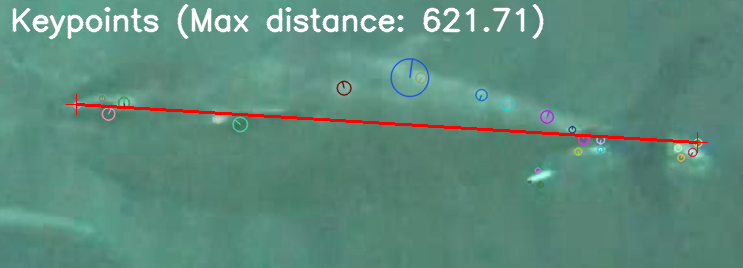

In [ ]:
#@markdown a
import cv2
import numpy as np

IMG_DIR = "/content/drive/MyDrive/data/tuna/"
img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

max_dist = -1
for i in range(len(kp)):
    for j in range(i+1, len(kp)):
        dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
        if dist > max_dist:
            max_dist = dist
            max_i = i
            max_j = j

# Draw a line between the keypoints with the maximum distance
img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)

# Add the max distance to the title
title = f"Keypoints (Max distance: {max_dist:.2f})"
cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the image with the line and title
from google.colab.patches import cv2_imshow
cv2_imshow(img_kp_with_line)


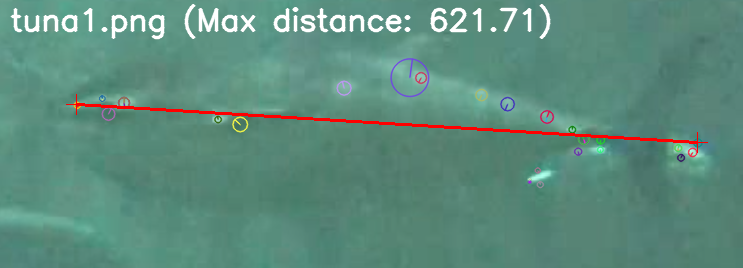

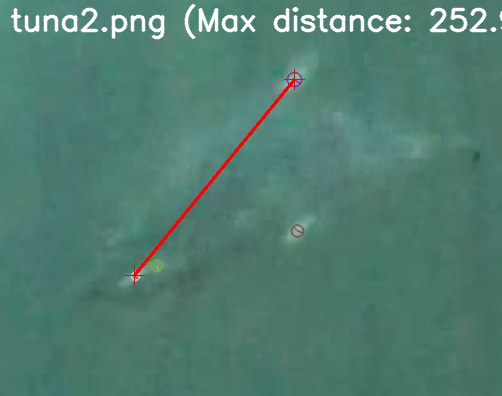

In [ ]:
#@markdown a
import cv2
import numpy as np
import os

IMG_DIR = "/content/drive/MyDrive/data/tuna/"
for filename in os.listdir(IMG_DIR):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(IMG_DIR, filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        sift = cv2.xfeatures2d.SIFT_create()
        kp = sift.detect(gray, None)

        img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        max_dist = -1
        for i in range(len(kp)):
            for j in range(i+1, len(kp)):
                dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
                if dist > max_dist:
                    max_dist = dist
                    max_i = i
                    max_j = j

        # Draw a line between the keypoints with the maximum distance
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)

        # Add the max distance to the title
        title = f"{filename} (Max distance: {max_dist:.2f})"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the image with the line and title
        from google.colab.patches import cv2_imshow
        cv2_imshow(img_kp_with_line)


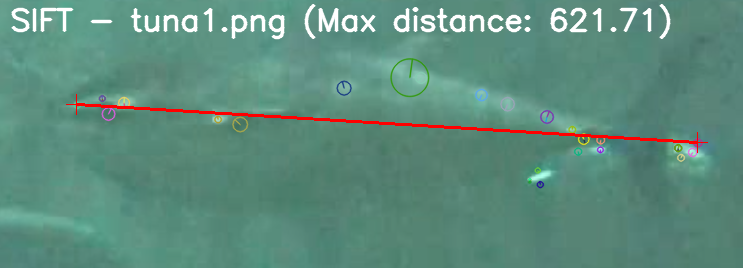

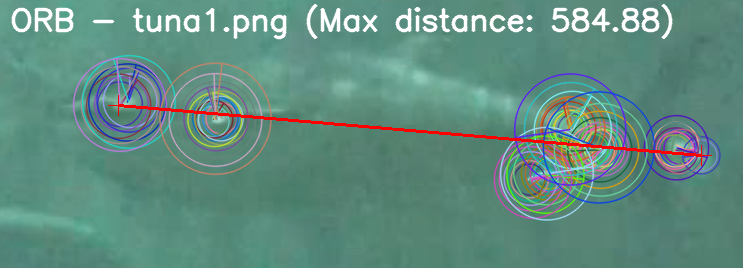

error: ignored

In [ ]:
import cv2
import numpy as np

def detect_keypoints(img, method='sift'):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if method == 'sift':
        detector = cv2.xfeatures2d.SIFT_create()
    elif method == 'orb':
        detector = cv2.ORB_create()
    elif method == 'surf':
        detector = cv2.xfeatures2d.SURF_create()
    elif method == 'fast':
        detector = cv2.FastFeatureDetector_create()

    kp = detector.detect(gray, None)
    return kp

def draw_keypoints(img, kp):
    img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_kp

def get_max_distance(kp):
    max_dist = -1
    for i in range(len(kp)):
        for j in range(i+1, len(kp)):
            dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
            if dist > max_dist:
                max_dist = dist
                max_i = i
                max_j = j
    return max_dist, max_i, max_j

def draw_line_between_keypoints(img, kp, max_i, max_j):
    img_with_line = cv2.drawMarker(img, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
    img_with_line = cv2.drawMarker(img_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
    img_with_line = cv2.line(img_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
    return img_with_line

def add_title_to_image(img, title):
    cv2.putText(img, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return img

IMG_DIR = "/content/drive/MyDrive/data/tuna/"
img_files = ["tuna1.png", "tuna2.png"]
methods = ["sift", "orb", "surf", "fast"]
for img_file in img_files:
    for method in methods:
        img = cv2.imread(IMG_DIR + img_file)
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_with_line = draw_line_between_keypoints(img_kp, kp, max_i, max_j)
        title = f"{method.upper()} - {img_file} (Max distance: {max_dist:.2f})"
        img_with_title = add_title_to_image(img_with_line, title)
        from google.colab.patches import cv2_imshow
        cv2_imshow(img_with_title)


In [ ]:
import cv2
import numpy as np
import os

IMG_DIR = "/content/drive/MyDrive/data/tuna/"

def detect_keypoints(img, method):
    if method == 'sift':
        detector = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        detector = cv2.xfeatures2d.SURF_create()
    elif method == 'fast':
        detector = cv2.FastFeatureDetector_create()
    else:
        raise ValueError(f"Unknown feature detection method: {method}")
    kp = detector.detect(img, None)
    return kp

def draw_keypoints(img, kp):
    img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_kp

def get_max_distance(kp):
    max_dist = -1
    for i in range(len(kp)):
        for j in range(i+1, len(kp)):
            dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
            if dist > max_dist:
                max_dist = dist
                max_i = i
                max_j = j
    return max_dist, max_i, max_j

methods = ['sift', 'fast']

for filename in os.listdir(IMG_DIR):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    for method in methods:
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"{filename} ({method.capitalize()} max distance: {max_dist:.2f})"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('image', img_kp_with_line)
        cv2.waitKey(0)

cv2.destroyAllWindows()


DisabledFunctionError: ignored

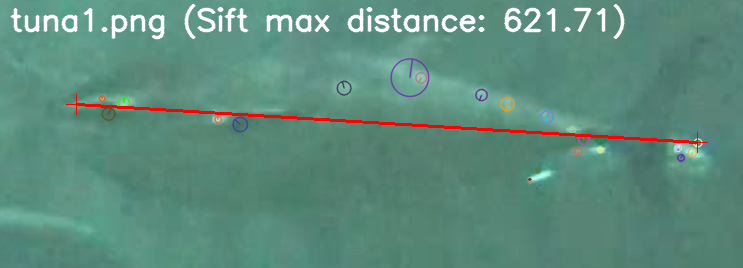

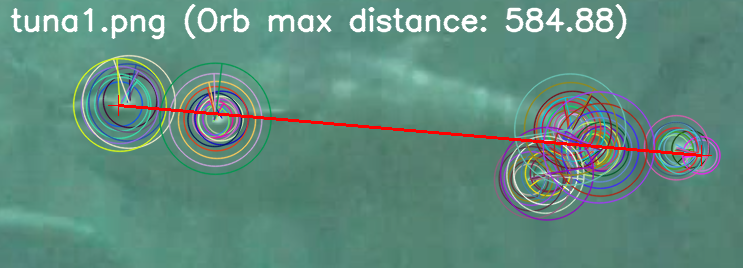

UnboundLocalError: ignored

In [ ]:
import cv2
import numpy as np
import os

from google.colab.patches import cv2_imshow

IMG_DIR = "/content/drive/MyDrive/data/tuna/"

def detect_keypoints(img, method):
    if method == 'sift':
        detector = cv2.xfeatures2d.SIFT_create()
    elif method == 'orb':
        detector = cv2.ORB_create()
    # elif method == 'surf':
    #     detector = cv2.xfeatures2d.SURF_create()
    elif method == 'fast':
        detector = cv2.FastFeatureDetector_create()

    kp = detector.detect(img, None)
    return kp

def draw_keypoints(img, kp):
    img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_kp

def get_max_distance(kp):
    max_dist = -1
    for i in range(len(kp)):
        for j in range(i+1, len(kp)):
            dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
            if dist > max_dist:
                max_dist = dist
                max_i = i
                max_j = j
    return max_dist, max_i, max_j

methods = ['sift', 'orb', 'surf', 'fast']

for filename in os.listdir(IMG_DIR):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    for method in methods:
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"{filename} ({method.capitalize()} max distance: {max_dist:.2f})"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2_imshow(img_kp_with_line)


In [ ]:
def detect_keypoints(img, method):
    detector = None
    if method == 'sift':
        detector = cv2.xfeatures2d.SIFT_create()
    elif method == 'orb':
        detector = cv2.ORB_create()
    elif method == 'fast':
        detector = cv2.FastFeatureDetector_create()
    else:
        detector = cv2.FastFeatureDetector_create()

    kp = detector.detect(img, None)
    return kp


def draw_keypoints(img, kp):
    img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_kp

def get_max_distance(kp):
    max_dist = -1
    for i in range(len(kp)):
        for j in range(i+1, len(kp)):
            dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
            if dist > max_dist:
                max_dist = dist
                max_i = i
                max_j = j
    return max_dist, max_i, max_j


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
OUTPUT_DIR = "/content/drive/MyDrive/data/output/" #@param {type:"string"}

In [ ]:
import cv2
import numpy as np
import os

from google.colab.patches import cv2_imshow

methods = ['sift', 'orb', 'surf', 'fast']

# Create output directory
i = 1
while os.path.exists(OUTPUT_DIR + f"exp{i}"):
    i += 1
output_dir = OUTPUT_DIR + f"exp{i}"
os.makedirs(output_dir)

for filename in os.listdir(IMG_DIR):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    for method in methods:
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"{filename} ({method.capitalize()} max distance: {max_dist:.2f})"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Save output image to output directory
        output_path = os.path.join(output_dir, f"{filename}_{method}.jpg")
        cv2.imwrite(output_path, img_kp_with_line)


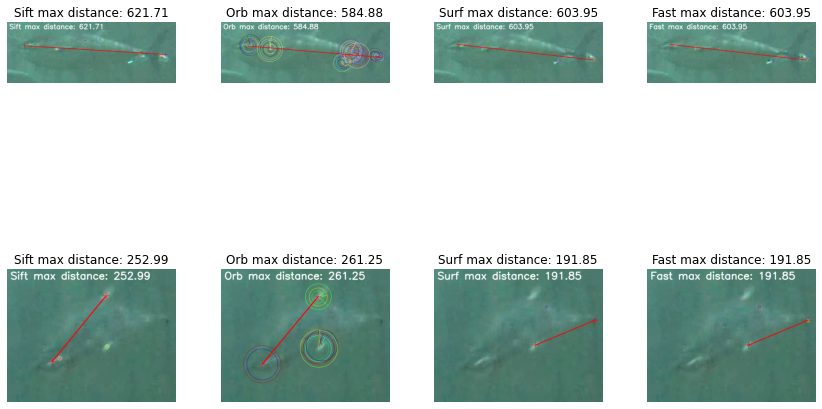

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

methods = ['sift', 'orb', 'surf', 'fast']

# Create output directory
i = 1
while os.path.exists(OUTPUT_DIR + f"exp{i}"):
    i += 1
output_dir = OUTPUT_DIR + f"exp{i}"
os.makedirs(output_dir)

fig, axs = plt.subplots(len(os.listdir(IMG_DIR)), len(methods), figsize=(12, 8))
fig.tight_layout()

for i, filename in enumerate(os.listdir(IMG_DIR)):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    for j, method in enumerate(methods):
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"{method.capitalize()} max distance: {max_dist:.2f}"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Save output image to output directory
        output_path = os.path.join(output_dir, f"{filename}_{method}.jpg")
        cv2.imwrite(output_path, img_kp_with_line)
        
        # Display output image in subplot
        axs[i, j].imshow(cv2.cvtColor(img_kp_with_line, cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
        axs[i, j].set_title(title)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        
plt.show()


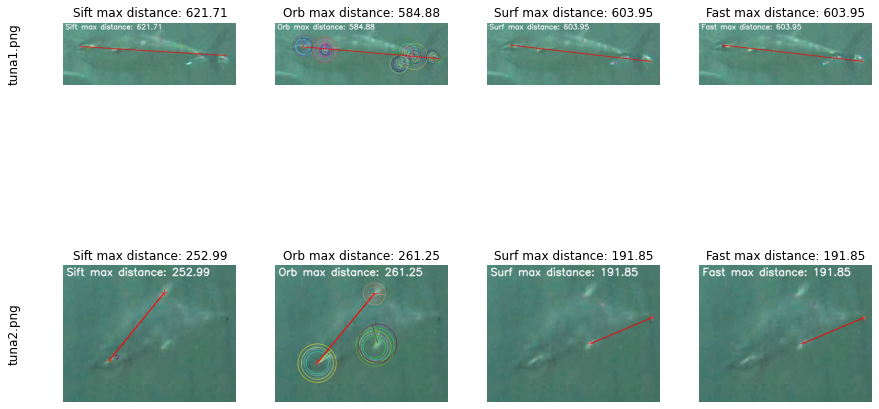

In [ ]:
#@markdown plot each
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

methods = ['sift', 'orb', 'surf', 'fast']

# Create output directory
i = 1
while os.path.exists(OUTPUT_DIR + f"exp{i}"):
    i += 1
output_dir = OUTPUT_DIR + f"exp{i}"
os.makedirs(output_dir)

fig, axs = plt.subplots(len(os.listdir(IMG_DIR)), len(methods), figsize=(12, 8))
fig.tight_layout(h_pad=0.5, w_pad=0.5)

for i, filename in enumerate(os.listdir(IMG_DIR)):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    
    # Add image name to left side of subplot
    axs[i, 0].text(-0.25, 0.5, filename, fontsize=12, ha='right', va='center', rotation=90, transform=axs[i, 0].transAxes)
    axs[i, 0].axis('off')
    
    for j, method in enumerate(methods):
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"{method.capitalize()} max distance: {max_dist:.2f}"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Save output image to output directory
        output_path = os.path.join(output_dir, f"{filename}_{method}.jpg")
        cv2.imwrite(output_path, img_kp_with_line)
        
        # Display output image in subplot
        axs[i, j].imshow(cv2.cvtColor(img_kp_with_line, cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
        axs[i, j].set_title(title)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        
plt.show()


In [ ]:
#@markdown OOP


# Augumentation

In [ ]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
!pip install -U -q albumentations

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img_names = os.listdir(IMG_DIR)
mask_names = os.listdir(MASK_DIR)

for img_name, mask_name in zip(img_names, mask_names):
    img = cv2.imread(IMG_DIR + img_name)
    mask = cv2.imread(MASK_DIR + mask_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_origin, mask_origin = img.copy(), mask.copy()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].imshow(img)
    axes[1].imshow(mask)
    plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img_names = os.listdir(IMG_DIR)
mask_names = os.listdir(MASK_DIR)

for img_name, mask_name in zip(img_names, mask_names):
    img_path = os.path.join(IMG_DIR, img_name)
    mask_path = os.path.join(MASK_DIR, mask_name)
    print(f'Reading image from {img_path}')
    img = cv2.imread(img_path)
    if img is None:
        print(f'Error: Failed to read image {img_path}')
        continue
    print(f'Reading mask from {mask_path}')
    mask = cv2.imread(mask_path)
    if mask is None:
        print(f'Error: Failed to read mask {mask_path}')
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    img_origin, mask_origin = img.copy(), mask.copy()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].imshow(img)
    axes[1].imshow(mask)
    plt.show()


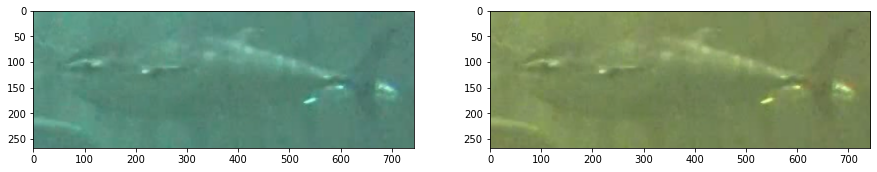

In [ ]:
import os, sys
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
mask = cv2.imread(MASK_DIR + 'mask.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_origin, mask_origin = img.copy(), mask.copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img)
axes[1].imshow(mask)
plt.show()


In [ ]:
import os, sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna' #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
mask = cv2.imread(MASK_DIR + 'mask.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

img_origin, mask_origin = img.copy(), mask.copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img)
axes[1].imshow(mask);

error: ignored

# Detect

In [71]:
%cd /content/drive/MyDrive/yolov8_tracking/yolov8
!pip install -qr requirements.txt

/content/drive/MyDrive/yolov8_tracking/yolov8


In [72]:
!pip install albumentations -q
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [73]:
!pip install -U -q albumentations

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/drive/MyDrive/data/all1490_T/data.yaml epochs=150 imgsz=640 batch=16

100% 131M/131M [00:01<00:00, 72.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/drive/MyDrive/data/all1490_T/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

# Track



In [69]:
%cd /content/drive/MyDrive/yolov8_tracking
!pip install -qr requirements.txt

/content/drive/MyDrive/yolov8_tracking
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.7 MB/s eta 0:00:00


In [ ]:
input = "/content/drive/MyDrive/data/733.m4v" #@param {type:"string"}

In [ ]:
!python track.py --source {input} --yolo-weights yolov8s.pt --save-vid --save-txt

track: yolo_weights=[PosixPath('yolov8s.pt')], reid_weights=/content/drive/MyDrive/yolov8_tracking/weights/osnet_x0_25_msmt17.pt, tracking_method=bytetrack, tracking_config=trackers/bytetrack/configs/bytetrack.yaml, source=/content/drive/MyDrive/data/733.m4v, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, show_vid=False, save_txt=False, save_conf=False, save_crop=False, save_trajectories=False, save_vid=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/track, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, hide_class=False, half=False, dnn=False, vid_stride=1, retina_masks=False
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
video 1/1 (1/148) /content/drive/MyDrive/data/733.m4v: 384x640 (no detections), 18.3ms
video 1/1 (2/148) /content/drive/MyDr